In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = "tutorials/coursera/data/ex2data1.txt"
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Text(0,0.5,'Exam 2')

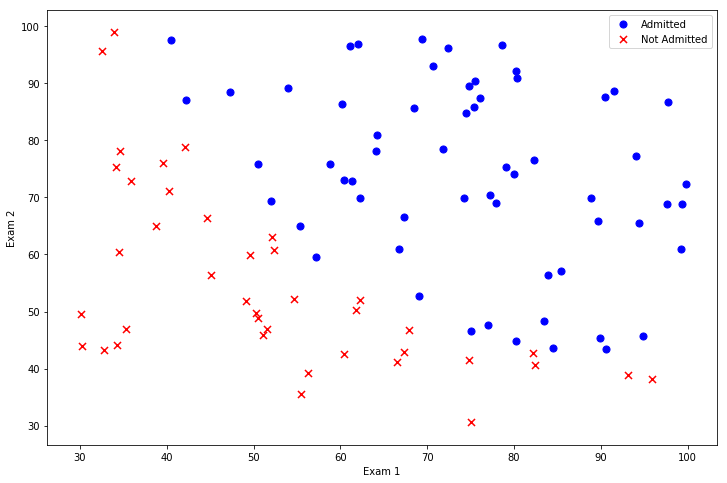

In [3]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel("Exam 1")
ax.set_ylabel("Exam 2")

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

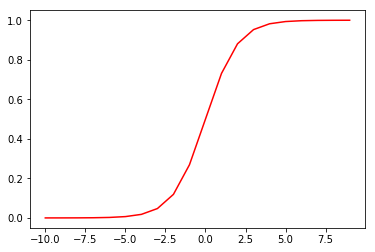

In [5]:
nums = np.arange(-10, 10, step=1)
plt.plot(nums, sigmoid(nums), 'r')

In [6]:
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / len(X)

In [7]:
data.insert(0, 'Ones', 1)

cols = data.shape[1]
X = np.array(data.iloc[:,:cols-1].values)
y = np.array(data.iloc[:,cols-1:cols].values)
theta = np.zeros(3)

cost(theta, X, y)

0.6931471805599453

In [8]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    return grad

In [9]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [11]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
result

(array([-25.16131872,   0.20623159,   0.20147149]), 36, 0)

In [12]:
cost(result[0], X, y)

0.20349770158947425

In [13]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [14]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b==1) or (a == 0 and b==0)) else 0 for (a,b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print('Accuracy:', accuracy)

Accuracy: 89
